# Técnicas de Pré-processamento para OCR

# Importando as bibliotecas

In [5]:
import cv2
import pytesseract
import numpy as np

import matplotlib.pyplot as plt
from PIL import Image

# Escala de cinza (*grayscale*)

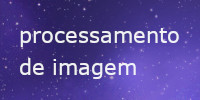

In [6]:
img = cv2.imread('../data/Imagens/img-process.jpg')
Image.fromarray(img)

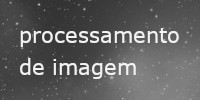

In [7]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
Image.fromarray(gray)

# Limiarização  (*thresholding*)

## Limiarização Simples (*Threshold*)

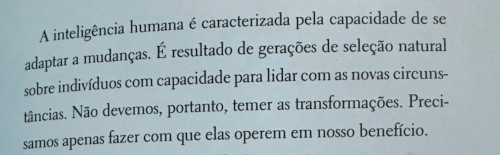

In [8]:
img = cv2.imread('../data/Imagens/trecho-livro.jpg')
Image.fromarray(img)

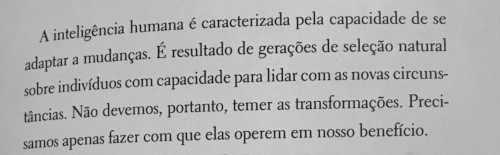

In [9]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
Image.fromarray(gray)

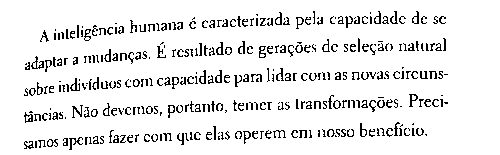

In [10]:
val, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
Image.fromarray(thresh)

In [11]:
val

127.0

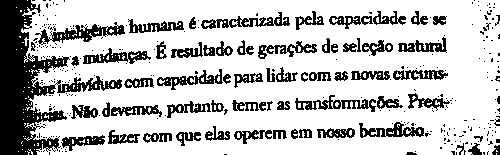

In [12]:
val, thresh = cv2.threshold(gray, 180, 255, cv2.THRESH_BINARY)
Image.fromarray(thresh)

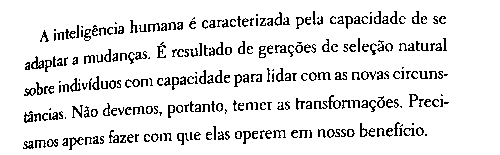

In [13]:
val, thresh = cv2.threshold(gray, 140, 255, cv2.THRESH_BINARY)
Image.fromarray(thresh)

## Método de Otsu

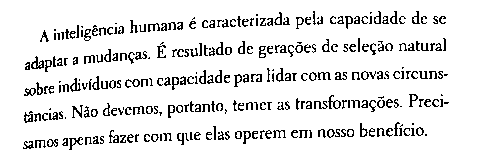

In [14]:
val, otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
Image.fromarray(otsu)

In [15]:
print(val)

138.0


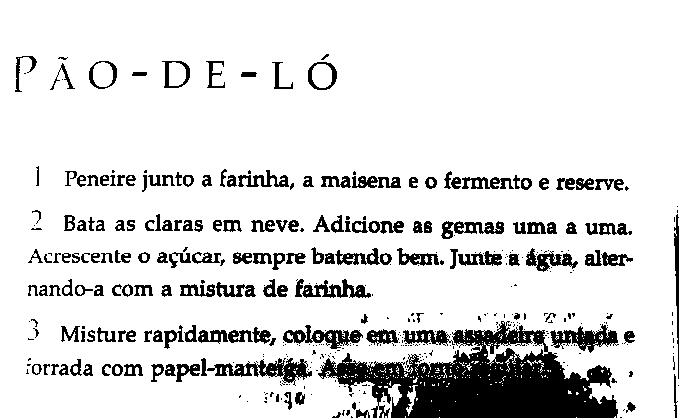

In [16]:
img = cv2.imread('../data/Imagens/receita01.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
val, thresh = cv2.threshold(gray, 138, 255, cv2.THRESH_BINARY)

Image.fromarray(thresh)

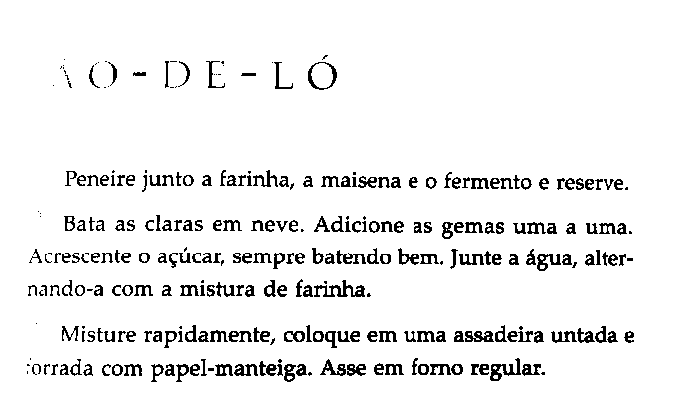

In [17]:
val, otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
Image.fromarray(otsu)

In [18]:
print(val)

119.0


## Limiarização Adaptativa

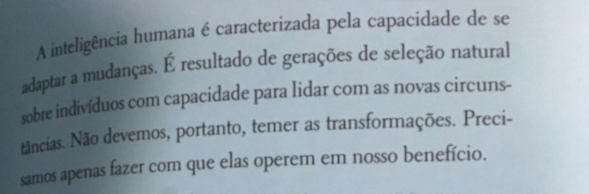

In [19]:
img = cv2.imread('../data/Imagens/livro02.jpg')
Image.fromarray(img)

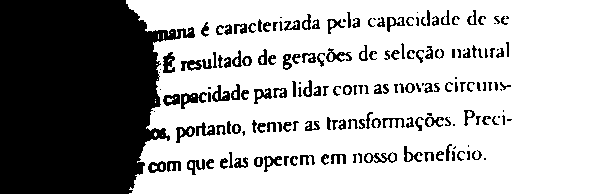

In [20]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
val, otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
Image.fromarray(otsu)

In [21]:
print(val)

147.0


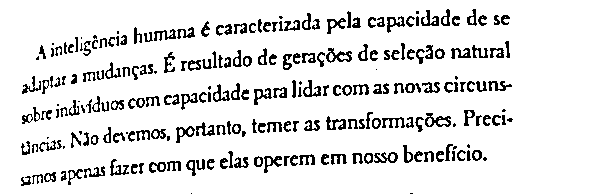

In [22]:
adapt_media = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 9)
Image.fromarray(adapt_media)

## Limiarização Adaptativa Gaussiana

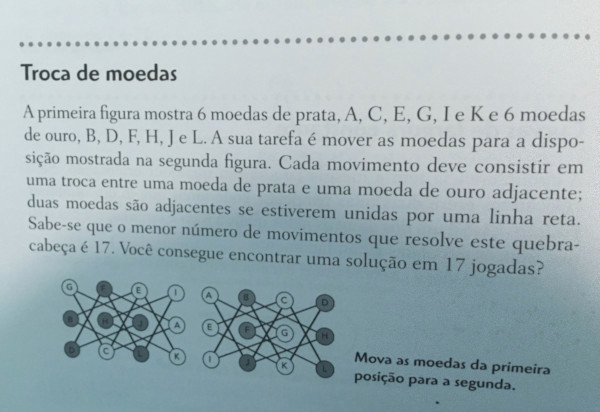

In [23]:
img = cv2.imread('../data/Imagens/livro_adaptativa.jpg')
Image.fromarray(img)

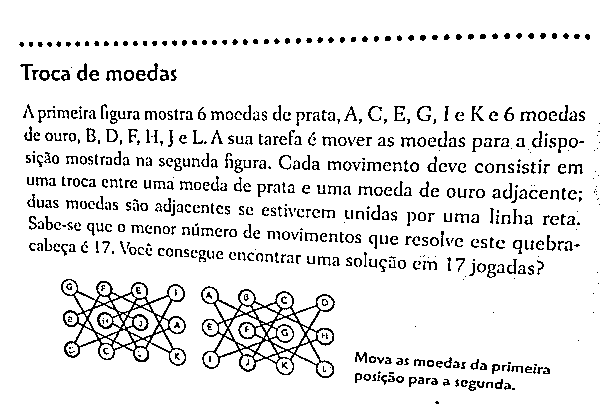

In [24]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
adapt_media_gauss = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 9)

Image.fromarray(adapt_media_gauss)

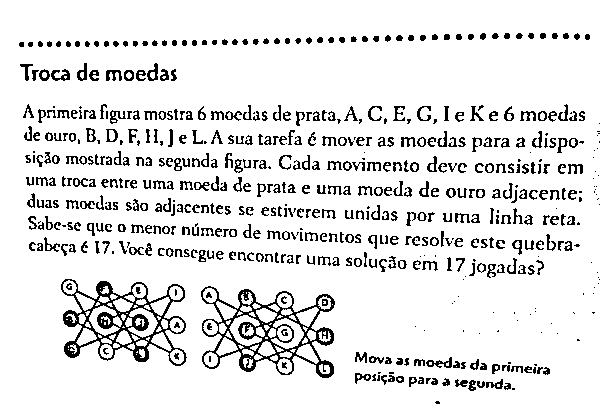

In [25]:
adapt_media = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 9)
Image.fromarray(adapt_media)

# Inversão

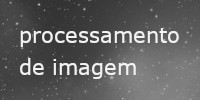

In [26]:
img = cv2.imread('../data/Imagens/img-process.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
Image.fromarray(gray)

In [27]:
gray

array([[ 68,  70,  72, ...,  76,  74,  74],
       [ 68,  70,  73, ...,  75,  74,  77],
       [ 70,  70,  72, ...,  74,  73,  76],
       ...,
       [ 67,  69,  82, ..., 123, 123, 124],
       [ 70,  76,  92, ..., 124, 124, 125],
       [ 70,  70,  80, ..., 123, 122, 123]], shape=(100, 200), dtype=uint8)

In [28]:
invert = 255 - gray

In [29]:
invert

array([[187, 185, 183, ..., 179, 181, 181],
       [187, 185, 182, ..., 180, 181, 178],
       [185, 185, 183, ..., 181, 182, 179],
       ...,
       [188, 186, 173, ..., 132, 132, 131],
       [185, 179, 163, ..., 131, 131, 130],
       [185, 185, 175, ..., 132, 133, 132]], shape=(100, 200), dtype=uint8)

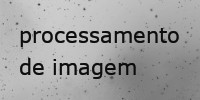

In [30]:
Image.fromarray(invert)

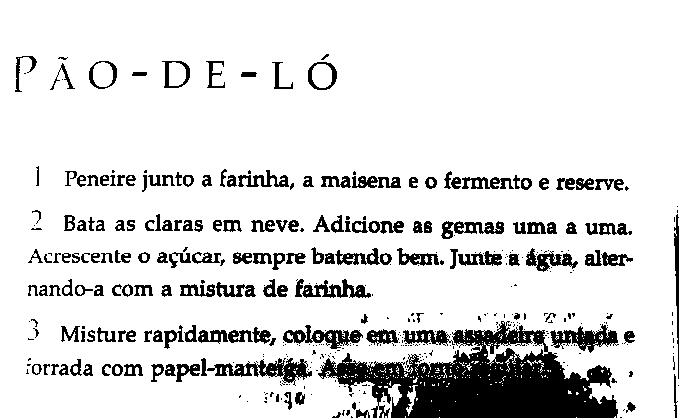

In [31]:
Image.fromarray(thresh)

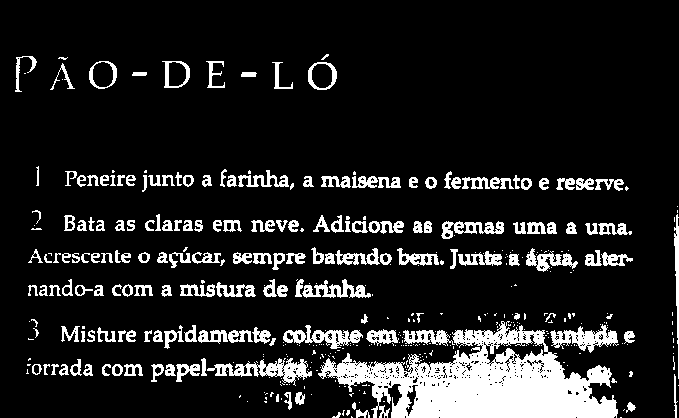

In [32]:
invert = 255 - thresh
Image.fromarray(invert)

# Redimensionamento

- INTER_NEAREST - uma interpolação de vizinho mais próximo. É muito usado por ser o mais rápido.
- INTER_LINEAR - uma interpolação bilinear (é usada por padrão), boa no geral para aumentar e também pra diminuir imagens.
- INTER_AREA - usa a relação de área de pixel. Pode ser um método preferido para a redução de imagens pois fornece resultados sem moiré (efeito geralmente indesejado na imagem). Mas quando a imagem é ampliada, é semelhante ao método INTER_NEAREST.
- INTER_CUBIC - bicúbica (4x4 pixel vizinhos). Possui resultados melhores.
- INTER_LANCZOS4 - interpolação Lanczos (8x8 pixel vizinhos). Dentre esses algoritmos, é o que apresenta resultados com a melhor qualidade.

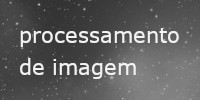

In [33]:
Image.fromarray(gray)

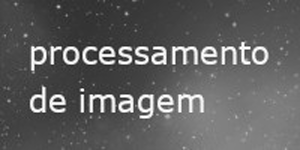

In [34]:
maior = cv2.resize(gray, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_CUBIC)
Image.fromarray(maior)

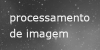

In [35]:
menor = cv2.resize(gray, None, fx = 0.5, fy = 0.5, interpolation=cv2.INTER_AREA)
Image.fromarray(menor)

# Operações Morfológicas

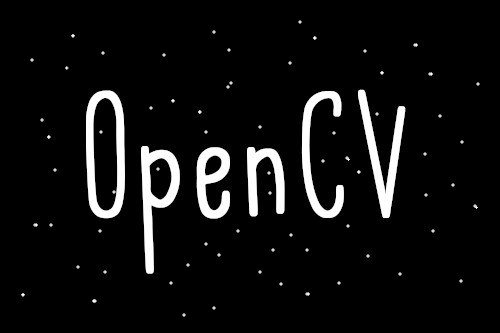

In [36]:
img = cv2.imread('../data/Imagens/texto-opencv.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
Image.fromarray(gray)

## Erosão

In [37]:
np.ones((3, 3), np.uint8)

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

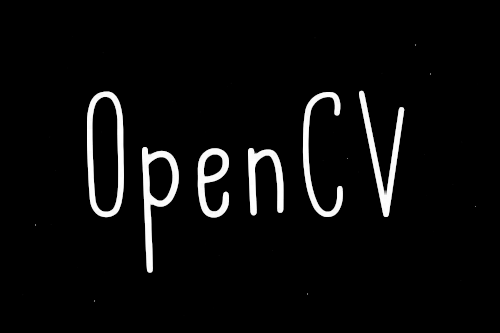

In [38]:
erosao = cv2.erode(gray, np.ones((3, 3), np.uint8))
Image.fromarray(erosao)

## Dilatação

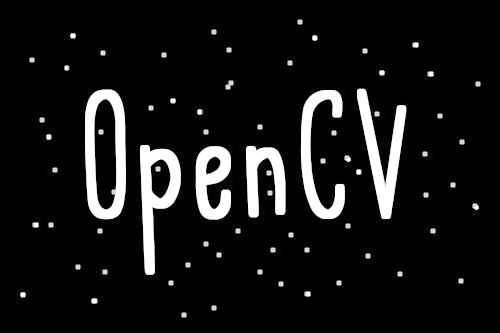

In [39]:
dilatacao = cv2.dilate(gray, np.ones((3,3), np.uint8))
Image.fromarray(dilatacao)

## Abertura

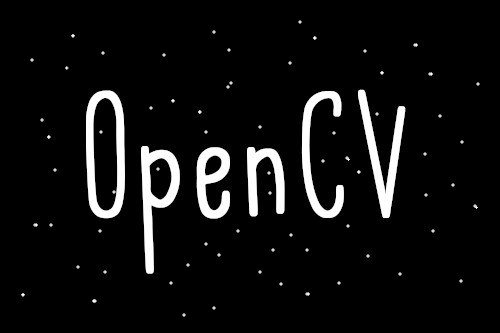

In [40]:
erosao = cv2.erode(gray, np.ones((5, 5), np.uint8))
abertura = cv2.dilate(erosao, np.ones((5,5), np.uint8))
Image.fromarray(gray)

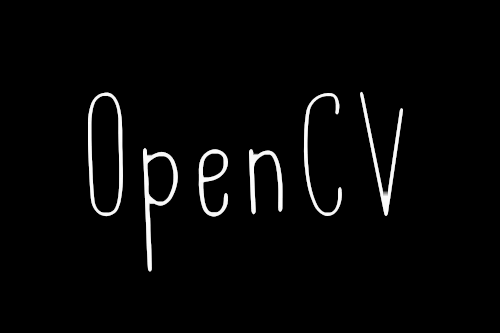

In [41]:
Image.fromarray(erosao)

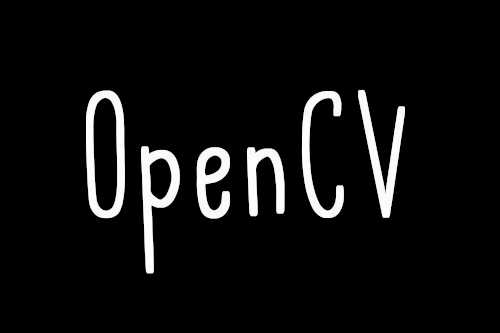

In [42]:
Image.fromarray(abertura)

## Fechamento

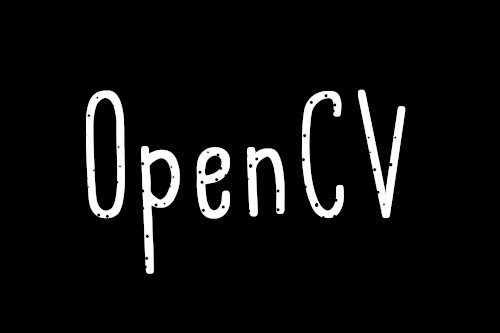

In [43]:
img = cv2.imread('../data/Imagens/texto-opencv2.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
Image.fromarray(gray)

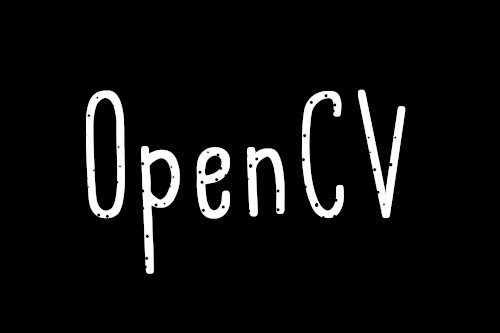

In [44]:
dilatacao = cv2.dilate(gray, np.ones((5,5)))
fechamento = cv2.erode(dilatacao, np.ones((5,5)))
Image.fromarray(gray)

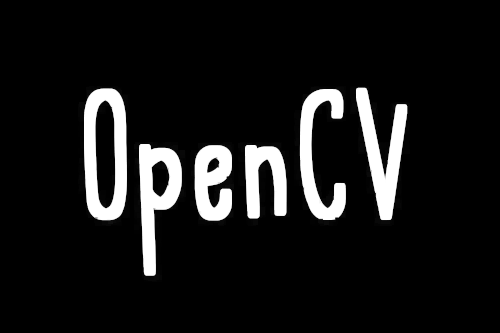

In [45]:
Image.fromarray(dilatacao)

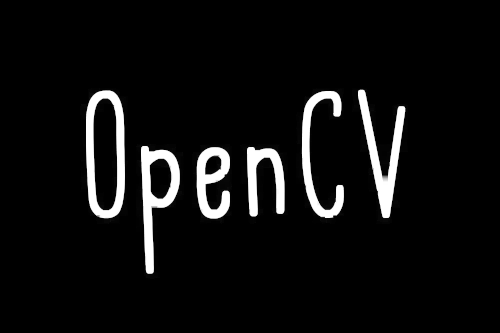

In [46]:
Image.fromarray(fechamento)

# Remoção de Ruído

## Desfoque com Média

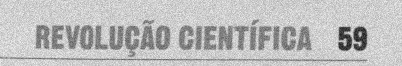

In [47]:
img = cv2.imread('../data/Imagens/teste_ruido.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
Image.fromarray(gray)

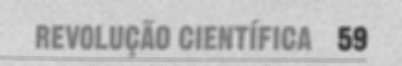

In [48]:
desfoque_media = cv2.blur(gray, (5,5))
Image.fromarray(desfoque_media)

## Desfoque Gaussiano


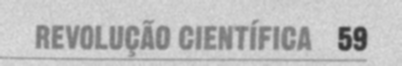

In [49]:
desfoque_gaussiano = cv2.GaussianBlur(gray, (5, 5), 0)
Image.fromarray(desfoque_gaussiano)

## Desfoque com Mediana

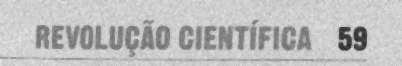

In [50]:
desfoque_mediana = cv2.medianBlur(gray, 3)
Image.fromarray(desfoque_mediana)

## Filtro bilateral

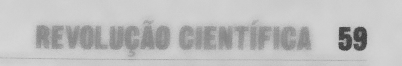

In [51]:
desfoque_bilateral = cv2.bilateralFilter(gray, 15, 55, 45)
Image.fromarray(desfoque_bilateral)

# Detecção de textos

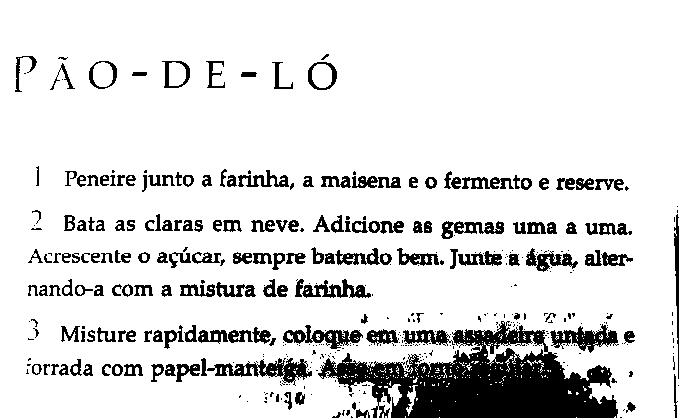

In [52]:
Image.fromarray(thresh)

In [53]:
texto = pytesseract.image_to_string(thresh, lang='por')
print(texto)

PÃO-DE-LÓ

|. Peneire junto a farinha, a maisena e o fermento e reserve.

2 Bata as claras em neve. Adicione as gemas uma a uma,

Acrescente o açúcar, sempre batendo bem. Juite à "água, alter
nando-a com a mistura de farinha.
3 Misture rapidamente, cologue emumas

forrada com papel-manteigã: à
' “u




# Exercício

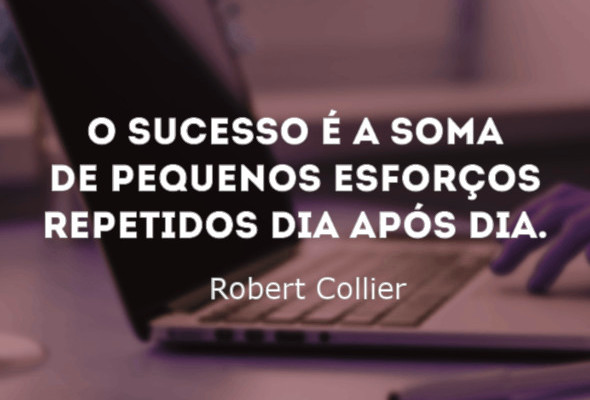

In [54]:
img = cv2.imread('../data/Imagens/frase.jpg')
Image.fromarray(img)

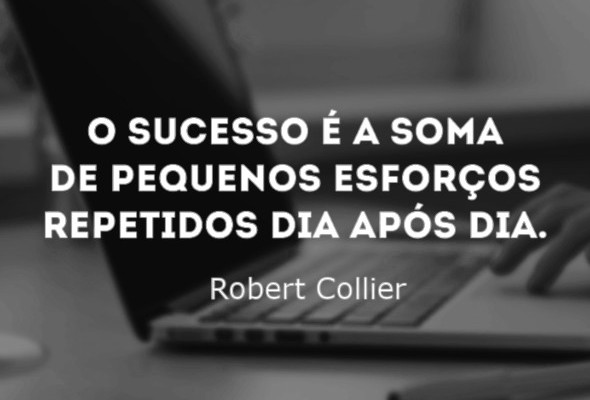

In [55]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
Image.fromarray(gray)

In [56]:
val, thresh = cv2.threshold(gray, 180, 255, cv2.THRESH_BINARY)
Image.fromarray(thresh)
print(val)

180.0


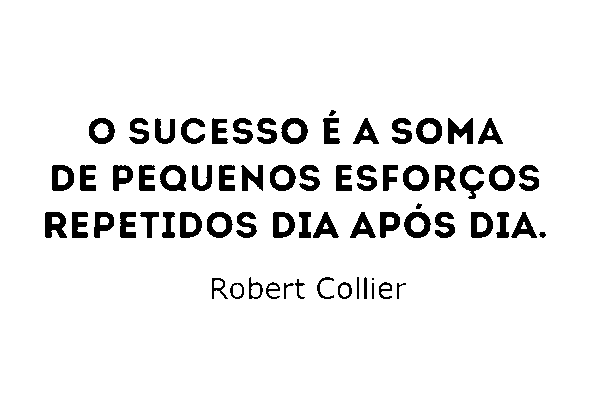

In [57]:
invert = 255 - thresh
Image.fromarray(invert)

In [59]:
print(pytesseract.image_to_string(thresh, lang='por'))

O SUCESSO É A SOMA
DE PEQUENOS ESFORÇOS
REPETIDOS DIA APÓS DIA.

Robert Collier

